In [1]:
# Load libraries
require(foreign)
require(nnet)
require(ggplot2)
require(reshape2)
library(dplyr)

# Load the dataset
ml <- read.dta("https://stats.idre.ucla.edu/stat/data/hsbdemo.dta")

Loading required package: foreign

Loading required package: nnet

Loading required package: ggplot2

Loading required package: reshape2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Review the dataset, structure, summary, etc.
head(ml)

,id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid
,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>
1,45,female,low,public,vocation,34,35,41,29,26,not enrolled,0,1
2,108,male,middle,public,general,34,33,41,36,36,not enrolled,0,1
3,15,male,high,public,vocation,39,39,44,26,42,not enrolled,0,1
4,67,male,low,public,vocation,37,37,42,33,32,not enrolled,0,1
5,153,male,middle,public,vocation,39,31,40,39,51,not enrolled,0,1
6,51,female,high,public,general,42,36,42,31,39,not enrolled,0,1


In [3]:
names(ml)

[1] "id"      "female"  "ses"     "schtyp"  "prog"    "read"    "write"  
 [8] "math"    "science" "socst"   "honors"  "awards"  "cid"

In [4]:
str(ml)

'data.frame':	200 obs. of  13 variables:
 $ id     : num  45 108 15 67 153 51 164 133 2 53 ...
 $ female : Factor w/ 2 levels "male","female": 2 1 1 1 1 2 1 1 2 1 ...
 $ ses    : Factor w/ 3 levels "low","middle",..: 1 2 3 1 2 3 2 2 2 2 ...
 $ schtyp : Factor w/ 2 levels "public","private": 1 1 1 1 1 1 1 1 1 1 ...
 $ prog   : Factor w/ 3 levels "general","academic",..: 3 1 3 3 3 1 3 3 3 3 ...
 $ read   : num  34 34 39 37 39 42 31 50 39 34 ...
 $ write  : num  35 33 39 37 31 36 36 31 41 37 ...
 $ math   : num  41 41 44 42 40 42 46 40 33 46 ...
 $ science: num  29 36 26 33 39 31 39 34 42 39 ...
 $ socst  : num  26 36 42 32 51 39 46 31 41 31 ...
 $ honors : Factor w/ 2 levels "not enrolled",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ awards : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cid    : int  1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "datalabel")= chr "highschool and beyond (200 cases)"
 - attr(*, "time.stamp")= chr "30 Oct 2009 14:13"
 - attr(*, "formats")= chr [1:13] "%9.0g" "%9.0g" "%9.0g" "%9.0g" ...
 - attr(

In [5]:
summary(ml)

       id            female        ses         schtyp          prog    
 Min.   :  1.00   male  : 91   low   :47   public :168   general : 45  
 1st Qu.: 50.75   female:109   middle:95   private: 32   academic:105  
 Median :100.50                high  :58                 vocation: 50  
 Mean   :100.50                                                        
 3rd Qu.:150.25                                                        
 Max.   :200.00                                                        
      read           write            math          science     
 Min.   :28.00   Min.   :31.00   Min.   :33.00   Min.   :26.00  
 1st Qu.:44.00   1st Qu.:45.75   1st Qu.:45.00   1st Qu.:44.00  
 Median :50.00   Median :54.00   Median :52.00   Median :53.00  
 Mean   :52.23   Mean   :52.77   Mean   :52.65   Mean   :51.85  
 3rd Qu.:60.00   3rd Qu.:60.00   3rd Qu.:59.00   3rd Qu.:58.00  
 Max.   :76.00   Max.   :67.00   Max.   :75.00   Max.   :74.00  
     socst                honors        a

In [6]:
# Table visualize data
# (a) Make a table showing the proportion of males and females choosing the three different programs. Comment on the difference. Repeat this comparison but for SES rather than gender.
# Male vs. Female counts and proportions
with(ml, table(female, prog))
prop <- group_by(ml, female, prog) %>% summarise(count=n()) %>%
  group_by(female) %>% mutate(etotal=sum(count), proportion=count/etotal)
prop

        prog
female   general academic vocation
  male        21       47       23
  female      24       58       27

`summarise()` regrouping output by 'female' (override with `.groups` argument)



female,prog,count,etotal,proportion
<fct>,<fct>,<int>,<int>,<dbl>
male,general,21,91,0.2307692
male,academic,47,91,0.5164835
male,vocation,23,91,0.2527473
female,general,24,109,0.2201835
female,academic,58,109,0.5321101
female,vocation,27,109,0.2477064


In [7]:
# SES counts and proportions
with(ml, table(ses, prog))
prop2 <- group_by(ml, ses, prog) %>% summarise(count=n()) %>%
  group_by(ses) %>% mutate(etotal=sum(count), proportion=count/etotal)
prop2

        prog
ses      general academic vocation
  low         16       19       12
  middle      20       44       31
  high         9       42        7

`summarise()` regrouping output by 'ses' (override with `.groups` argument)



ses,prog,count,etotal,proportion
<fct>,<fct>,<int>,<int>,<dbl>
low,general,16,47,0.3404255
low,academic,19,47,0.4042553
low,vocation,12,47,0.2553191
middle,general,20,95,0.2105263
middle,academic,44,95,0.4631579
middle,vocation,31,95,0.3263158
high,general,9,58,0.1551724
high,academic,42,58,0.7241379
high,vocation,7,58,0.1206897


`summarise()` regrouping output by 'ses' (override with `.groups` argument)



ses,prog,count,etotal,proportion
<fct>,<fct>,<int>,<int>,<dbl>
low,general,16,47,0.3404255
low,academic,19,47,0.4042553
low,vocation,12,47,0.2553191
middle,general,20,95,0.2105263
middle,academic,44,95,0.4631579
middle,vocation,31,95,0.3263158
high,general,9,58,0.1551724
high,academic,42,58,0.7241379
high,vocation,7,58,0.1206897


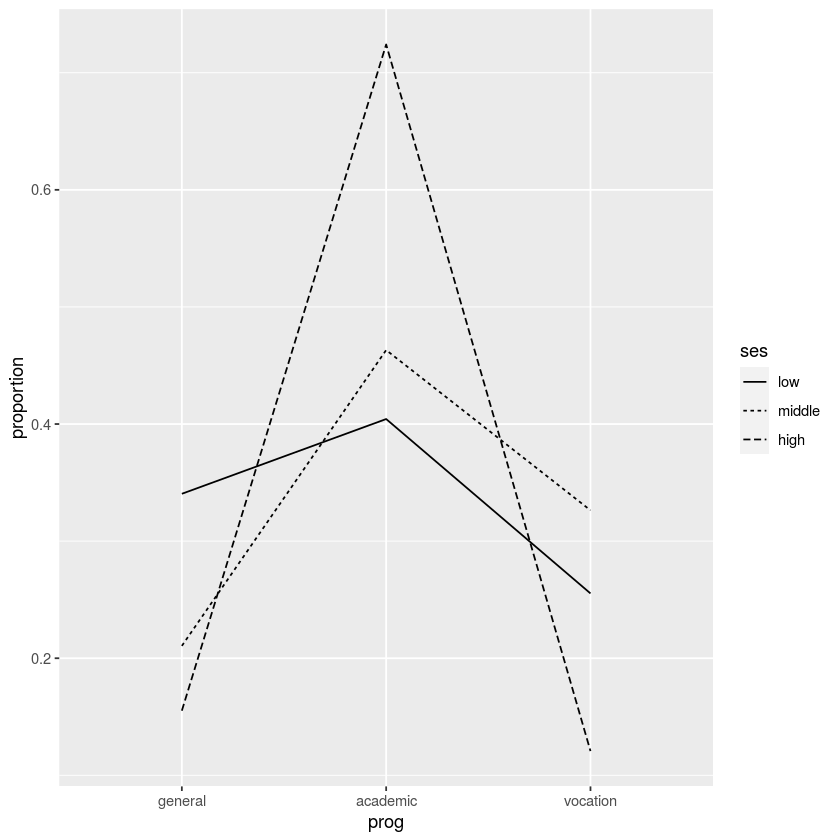

In [8]:
# (b) Construct a plot like the right panel of Figure 7.1 that shows the relationship between program choice and reading score. Comment on the plot. Repeat for math in place of reading.
# Proportion by Program Choice
prop2 <- group_by(ml, ses, prog) %>% summarise(count=n()) %>%
  group_by(ses) %>% mutate(etotal=sum(count), proportion=count/etotal)
prop2
ggplot(prop2, aes(x=prog, y=proportion, group=ses, linetype=ses)) + geom_line()

`summarise()` regrouping output by 'readgp' (override with `.groups` argument)



readgp,prog,count,etotal,proportion
<fct>,<fct>,<int>,<int>,<dbl>
"[28,42]",general,11,37,0.29729730
"[28,42]",academic,6,37,0.16216216
"[28,42]",vocation,20,37,0.54054054
"(42,47]",general,11,45,0.24444444
"(42,47]",academic,23,45,0.51111111
"(42,47]",vocation,11,45,0.24444444
"(47,50]",general,3,19,0.15789474
"(47,50]",academic,7,19,0.36842105
"(47,50]",vocation,9,19,0.47368421


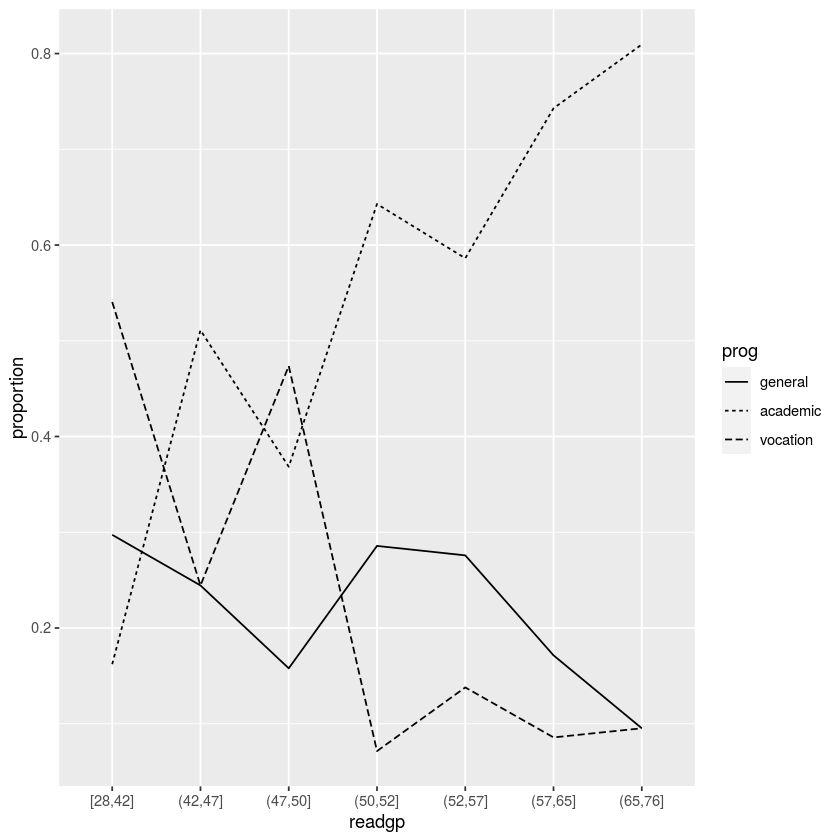

In [9]:
# Proportion by Reading Score
igp <- mutate(ml, readgp=cut_number(read,7)) %>% group_by(readgp, prog) %>%
  summarise(count=n()) %>% group_by(readgp) %>% 
  mutate(etotal=sum(count), proportion=count/etotal)
igp
ggplot(igp, aes(x=readgp, y=proportion, group=prog, linetype=prog)) + geom_line()

corrplot 0.84 loaded



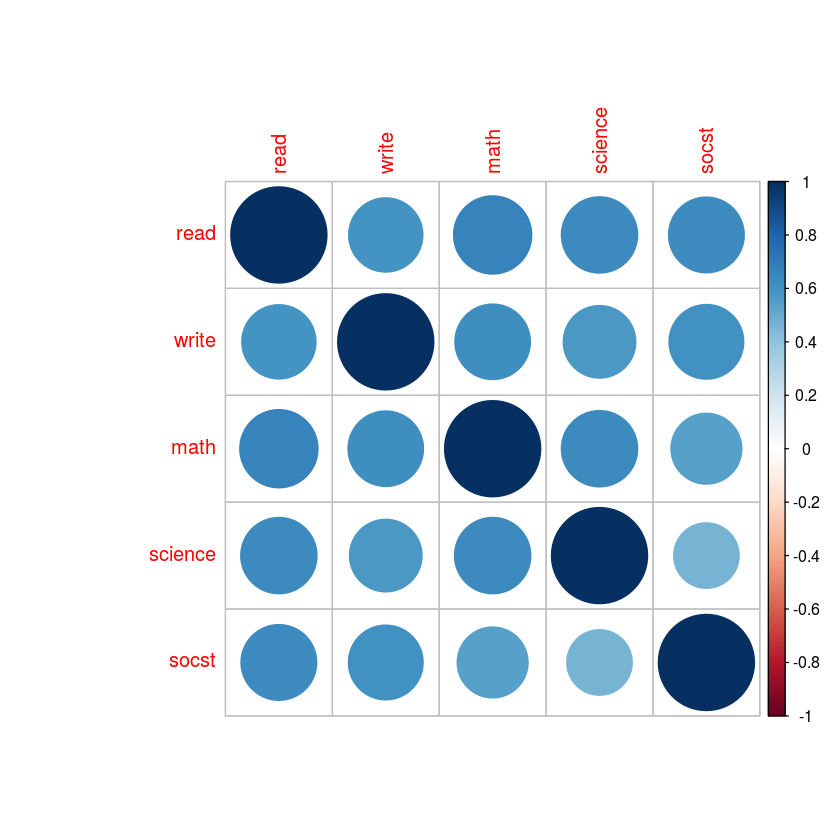

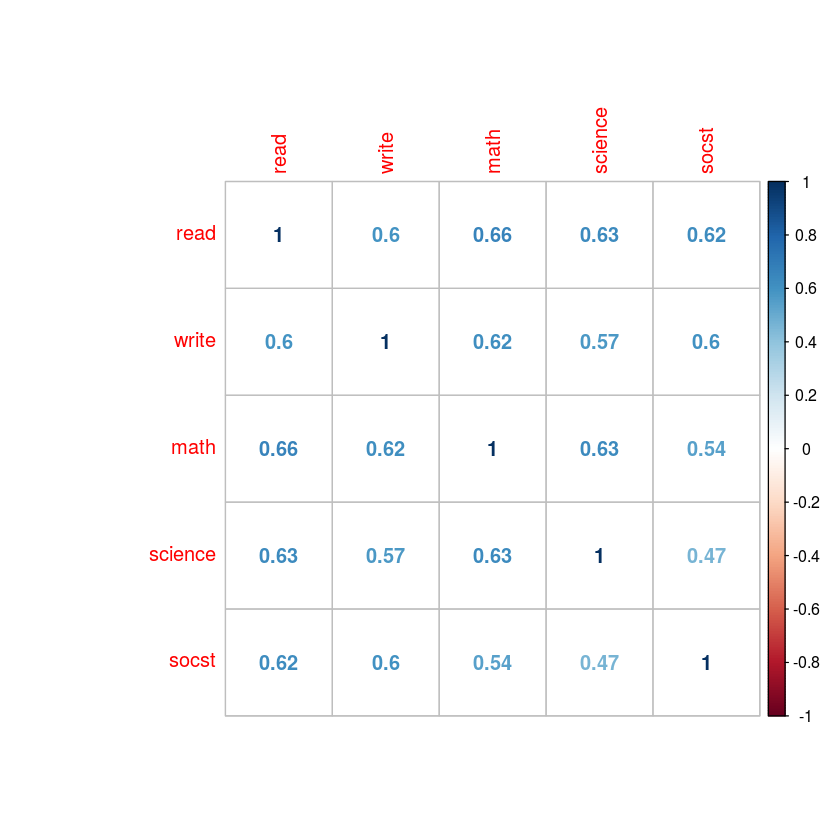

In [10]:
# (c) Compute the correlation matrix for the five subject scores.
library(corrplot)
myvars <- c("read","write","math","science","socst")
ml2 <- ml[myvars]
o=corrplot(cor(ml2)) 
o=corrplot(cor(ml2), 'number') 

In [11]:
# (d) Fit a multinomial response model for the program choice and examine the fitted coefficients 
# Of the five subjects, one gives unexpected coefficients. Identify this subject and suggest an explanation for this behavior.

# Reference point
ml$prog2 <- relevel(ml$prog, ref = "academic")
ml$prog2

# Fit Multinomial Regression
test <- multinom(prog2 ~ read + write + math + science + socst, data = ml)
summary(test)


[1] vocation general  vocation vocation vocation general  vocation vocation
  [9] vocation vocation vocation academic vocation vocation vocation general 
 [17] general  vocation academic vocation general  vocation vocation vocation
 [25] academic academic general  general  academic academic general  vocation
 [33] academic academic vocation vocation vocation academic general  academic
 [41] general  academic academic vocation academic vocation vocation general 
 [49] vocation academic academic vocation general  academic academic general 
 [57] academic general  vocation general  vocation academic academic vocation
 [65] vocation vocation general  academic academic general  academic academic
 [73] academic general  vocation general  vocation general  general  academic
 [81] vocation academic academic general  vocation academic general  general 
 [89] general  vocation vocation general  vocation academic vocation general 
 [97] academic vocation vocation general  academic vocation vocation vocation
[105] general  academic general  general  academic academic academic academic
[113] academic academic academic vocation academic academic academic academic
[121] vocation academic academic academic academic academic academic academic
[129] academic academic academic academic general  academic academic general 
[137] academic academic academic academic academic academic general  general 
[145] academic general  general  general  academic academic academic academic
[153] academic vocation general  academic academic academic academic academic
[161] general  general  academic academic academic vocation general  academic
[169] academic general  general  academic academic vocation academic academic
[177] academic academic academic academic academic academic academic general 
[185] academic academic academic academic academic academic academic academic
[193] academic academic academic academic vocation academic academic academic
Levels: academic general vocation

# weights:  21 (12 variable)
initial  value 219.722458 
iter  10 value 173.294170
final  value 164.975567 
converged


Call:
multinom(formula = prog2 ~ read + write + math + science + socst, 
    data = ml)

Coefficients:
         (Intercept)        read       write        math    science       socst
general     4.804643 -0.04558434 -0.02299500 -0.09837739 0.09359693 -0.03207906
vocation    9.405865 -0.03583817 -0.03743141 -0.11579827 0.05902499 -0.06751481

Std. Errors:
         (Intercept)       read      write       math    science      socst
general     1.498368 0.02958174 0.02958054 0.03329584 0.02985794 0.02567748
vocation    1.621442 0.03205540 0.02955005 0.03639133 0.03026686 0.02642707

Residual Deviance: 329.9511 
AIC: 353.9511 

In [12]:
# (e) Construct a derived variable that is the sum of the five subject scores. 
# Fit a multinomial model as before except with this one sum variable in place 
# of the five subjects separately. Compare the two models to decide which should be preferred.
ml$SUMscore <- ml$read + ml$write + ml$math + ml$science + ml$socst
ml$SUMscore
test2 <- multinom(prog2 ~ SUMscore, data = ml)
summary(test2)

[1] 165 180 190 181 200 190 198 186 196 187 198 198 194 200 194 207 212 208
 [19] 200 220 206 211 218 199 215 216 223 224 215 225 211 201 206 216 201 222
 [37] 212 227 217 228 228 239 219 225 227 220 240 215 231 231 236 221 232 239
 [55] 234 240 240 226 234 220 236 246 251 241 244 239 237 255 250 237 248 237
 [73] 253 254 258 253 253 254 245 260 236 241 256 241 248 268 264 250 265 255
 [91] 241 253 263 266 239 264 270 266 271 262 271 266 272 243 254 279 265 265
[109] 275 265 276 268 273 269 264 265 280 270 276 272 258 288 278 253 268 283
[127] 284 276 286 287 297 282 273 293 273 289 295 275 274 291 291 287 288 283
[145] 288 294 299 284 274 290 285 297 297 287 287 278 294 295 295 305 300 307
[163] 308 293 314 304 310 310 307 312 292 312 304 305 311 306 321 323 313 317
[181] 317 308 323 325 326 327 327 332 327 329 334 325 320 336 332 339 339 340
[199] 330 343

# weights:  9 (4 variable)
initial  value 219.722458 
iter  10 value 176.619114
iter  10 value 176.619114
final  value 176.619114 
converged


Call:
multinom(formula = prog2 ~ SUMscore, data = ml)

Coefficients:
         (Intercept)    SUMscore
general     4.191407 -0.01886820
vocation    8.645141 -0.03679921

Std. Errors:
         (Intercept)    SUMscore
general     1.367874 0.005157952
vocation    1.505506 0.006007857

Residual Deviance: 353.2382 
AIC: 361.2382 

In [13]:
# (f) Use a stepwise method to reduce the model. Which variables are in your selected model?
step(test)  # Key variables: Math, Science, SOCST


Start:  AIC=353.95
prog2 ~ read + write + math + science + socst

trying - read 
# weights:  18 (10 variable)
initial  value 219.722458 
iter  10 value 172.330870
final  value 166.302302 
converged
trying - write 
# weights:  18 (10 variable)
initial  value 219.722458 
iter  10 value 173.157560
final  value 165.801985 
converged
trying - math 
# weights:  18 (10 variable)
initial  value 219.722458 
iter  10 value 176.402124
final  value 172.243618 
converged
trying - science 
# weights:  18 (10 variable)
initial  value 219.722458 
iter  10 value 180.535654
final  value 170.511980 
converged
trying - socst 
# weights:  18 (10 variable)
initial  value 219.722458 
iter  10 value 174.067882
final  value 168.411657 
converged
          Df      AIC
- write   10 351.6040
- read    10 352.6046
<none>    12 353.9511
- socst   10 356.8233
- science 10 361.0240
- math    10 364.4872
# weights:  18 (10 variable)
initial  value 219.722458 
iter  10 value 173.157560
final  value 165.801985 
converge

Call:
multinom(formula = prog2 ~ math + science + socst, data = ml)

Coefficients:
         (Intercept)       math    science       socst
general     4.360566 -0.1193445 0.07432991 -0.05172859
vocation    8.855339 -0.1379384 0.03925004 -0.08828278

Residual Deviance: 334.6741 
AIC: 350.6741 

In [14]:
# (g) Construct a plot of predicted probabilities from your selected model where the math score varies over the observed range. Other predictors should be set at the most common level or mean value as appropriate. Your plot should be similar to Figure 7.2. Comment on the relationship.
# Calculate predicted probabilities
test$pred <- fitted(test)
test$pred
head(test$pred)

pp <- fitted(test)
head(pp)


,academic,general,vocation
1,0.09618049,0.1294066,0.7744129
2,0.10367156,0.2040446,0.6922838
3,0.40108440,0.1318698,0.4670458
4,0.13764660,0.1677065,0.6946469
5,0.18482740,0.2738509,0.5413217
6,0.24487323,0.1610303,0.5940965
7,0.22217771,0.2749171,0.5029052
8,0.12920703,0.1379300,0.7328630
9,0.06288718,0.2690176,0.6680952
10,0.12349780,0.2107459,0.6657563


,academic,general,vocation
1,0.09618049,0.1294066,0.7744129
2,0.10367156,0.2040446,0.6922838
3,0.40108440,0.1318698,0.4670458
4,0.13764660,0.1677065,0.6946469
5,0.18482740,0.2738509,0.5413217
6,0.24487323,0.1610303,0.5940965


,academic,general,vocation
1,0.09618049,0.1294066,0.7744129
2,0.10367156,0.2040446,0.6922838
3,0.40108440,0.1318698,0.4670458
4,0.13764660,0.1677065,0.6946469
5,0.18482740,0.2738509,0.5413217
6,0.24487323,0.1610303,0.5940965


In [15]:
predicted_scores <- predict (test, ml, "probs") # predict on new data
predicted_scores
predicted_class <- predict (test, ml)
predicted_class
table(predicted_class, ml$prog)
mean(as.character(predicted_class) != as.character(ml$prog))


,academic,general,vocation
1,0.09618049,0.1294066,0.7744129
2,0.10367156,0.2040446,0.6922838
3,0.40108440,0.1318698,0.4670458
4,0.13764660,0.1677065,0.6946469
5,0.18482740,0.2738509,0.5413217
6,0.24487323,0.1610303,0.5940965
7,0.22217771,0.2749171,0.5029052
8,0.12920703,0.1379300,0.7328630
9,0.06288718,0.2690176,0.6680952
10,0.12349780,0.2107459,0.6657563


[1] vocation vocation vocation vocation vocation vocation vocation vocation
  [9] vocation vocation vocation vocation vocation vocation vocation vocation
 [17] vocation vocation vocation vocation vocation vocation vocation vocation
 [25] vocation academic academic academic vocation vocation vocation vocation
 [33] vocation academic vocation vocation vocation academic vocation vocation
 [41] academic academic academic vocation academic vocation general  vocation
 [49] academic academic academic vocation vocation academic vocation general 
 [57] academic vocation academic vocation vocation general  academic general 
 [65] academic academic vocation academic academic academic academic academic
 [73] academic academic academic academic academic academic academic general 
 [81] general  general  academic vocation academic academic academic academic
 [89] general  general  vocation academic academic academic vocation academic
 [97] academic academic academic academic general  general  academic general 
[105] vocation academic academic academic academic academic academic academic
[113] academic academic academic academic academic academic academic academic
[121] academic academic academic vocation academic academic academic academic
[129] academic academic academic academic general  academic academic general 
[137] academic academic academic academic academic academic academic academic
[145] academic academic academic academic academic academic academic academic
[153] academic academic academic academic academic academic academic academic
[161] academic academic academic academic academic academic academic academic
[169] academic academic academic academic academic academic academic academic
[177] academic academic academic academic academic academic academic academic
[185] academic academic academic academic academic academic academic academic
[193] academic academic academic academic academic academic academic academic
Levels: academic general vocation

               
predicted_class general academic vocation
       academic      27       92       17
       general        4        4        6
       vocation      14        9       27

[1] 0.385

In [16]:
## Fit predictions based on model
ml$glm.probs <- predict (test, ml, "probs") # predict on new data
ml$glm.probs[1:200]
ml$glm.pred <- predict (test, ml)
ml$glm.pred[1:5]
table(ml$glm.pred,ml$prog)

[1] 0.09618049 0.10367156 0.40108440 0.13764660 0.18482740 0.24487323
  [7] 0.22217771 0.12920703 0.06288718 0.12349780 0.14020192 0.05948526
 [13] 0.19844311 0.09309393 0.03355265 0.28795672 0.18480362 0.23762297
 [19] 0.18561641 0.23590325 0.16030473 0.29556394 0.29120376 0.11129600
 [25] 0.24310355 0.41362537 0.50452326 0.44720853 0.30687678 0.36212147
 [31] 0.17046214 0.14394352 0.10901862 0.54170689 0.04118114 0.06170858
 [37] 0.23238526 0.51815701 0.11421675 0.31856806 0.47570395 0.75872146
 [43] 0.44186060 0.14133119 0.42896365 0.21825173 0.29559450 0.09584956
 [49] 0.62175949 0.54077053 0.43056360 0.19065949 0.30961741 0.82093280
 [55] 0.34200615 0.26242971 0.67240047 0.13094230 0.61361687 0.10510655
 [61] 0.32674746 0.24104144 0.41509361 0.21111611 0.59500322 0.42461702
 [67] 0.22713385 0.67347939 0.78508802 0.35397829 0.41719418 0.41068217
 [73] 0.43991459 0.43422366 0.62637926 0.41066799 0.72367930 0.42640808
 [79] 0.58167568 0.27354211 0.12645236 0.31017828 0.52747002 0.21944489
 [85] 0.60246258 0.62002627 0.48680512 0.49186352 0.37308374 0.23829911
 [91] 0.11759179 0.39158802 0.46821285 0.59278182 0.10148281 0.79819141
 [97] 0.67410568 0.51197600 0.61598483 0.56304314 0.29879484 0.18124634
[103] 0.55212779 0.06298856 0.04727890 0.83573190 0.58765366 0.58079973
[109] 0.50776936 0.61674386 0.64285501 0.80596599 0.93802717 0.59371229
[115] 0.38416737 0.44688713 0.79065314 0.69937318 0.73989407 0.61955962
[121] 0.39797183 0.81014990 0.80648024 0.13653217 0.70576028 0.43617112
[127] 0.49192059 0.40602441 0.81224327 0.66552684 0.73791658 0.62777438
[133] 0.22097805 0.92235723 0.87643063 0.43104701 0.84513213 0.61994293
[139] 0.40310225 0.73613426 0.64990546 0.76409779 0.72550936 0.59115194
[145] 0.75012273 0.73712937 0.75381117 0.71642872 0.49848967 0.77059596
[151] 0.71727562 0.80437695 0.51378090 0.82659159 0.57106001 0.72749522
[157] 0.79090275 0.93230625 0.44713992 0.56055922 0.62456098 0.57380630
[163] 0.93009440 0.71036784 0.92323531 0.63884648 0.78209364 0.80572245
[169] 0.93063677 0.74823329 0.47795740 0.89396124 0.94096829 0.70786083
[175] 0.91152993 0.79732247 0.94125781 0.92860917 0.90895192 0.85526572
[181] 0.90722663 0.85526121 0.90994368 0.58575765 0.92817204 0.92488216
[187] 0.80496327 0.86028961 0.88139514 0.93356761 0.96566947 0.79821535
[193] 0.87717927 0.96224969 0.83332075 0.90217019 0.89316176 0.95479497
[199] 0.91351870 0.93097130

[1] vocation vocation vocation vocation vocation
Levels: academic general vocation

          
           general academic vocation
  academic      27       92       17
  general        4        4        6
  vocation      14        9       27

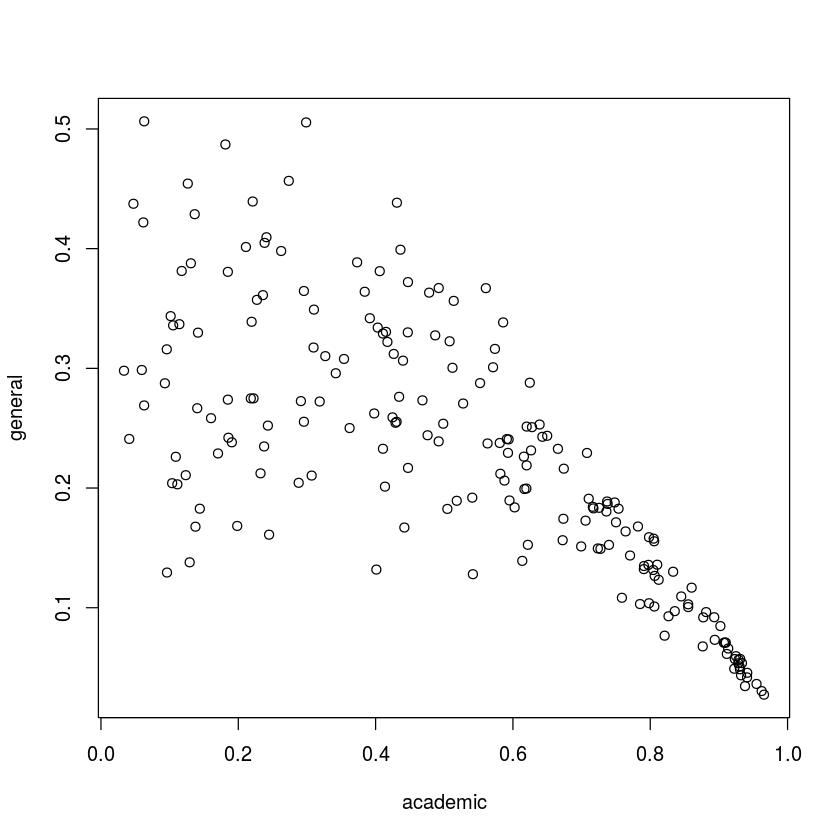

In [17]:
## Visuals for Predictions
plot(ml$glm.probs)
plot(fitted(test))


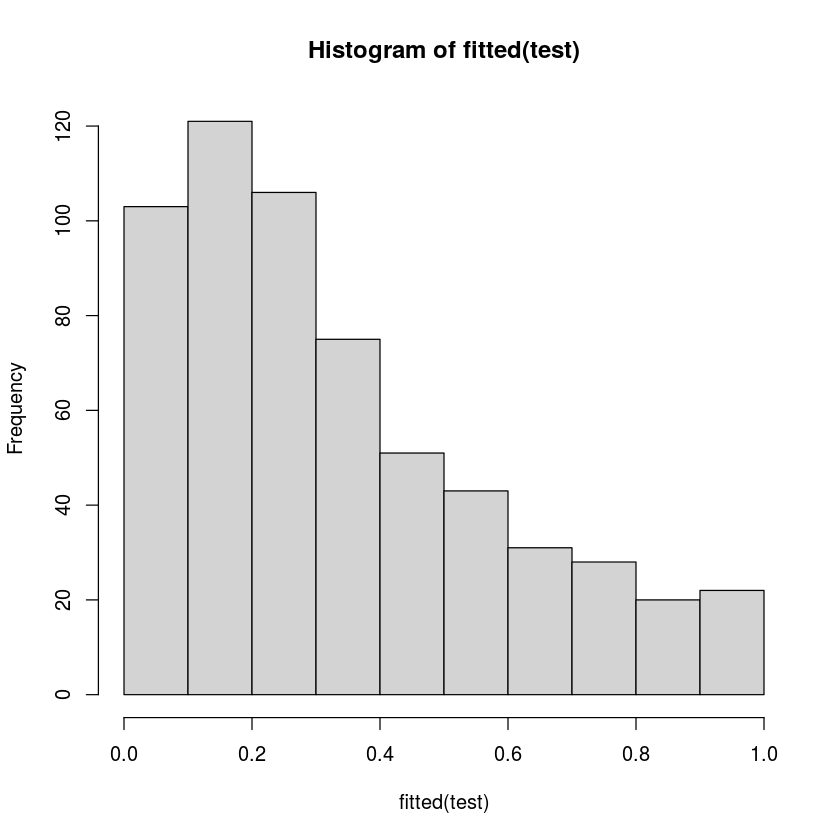

In [18]:
hist(fitted(test))

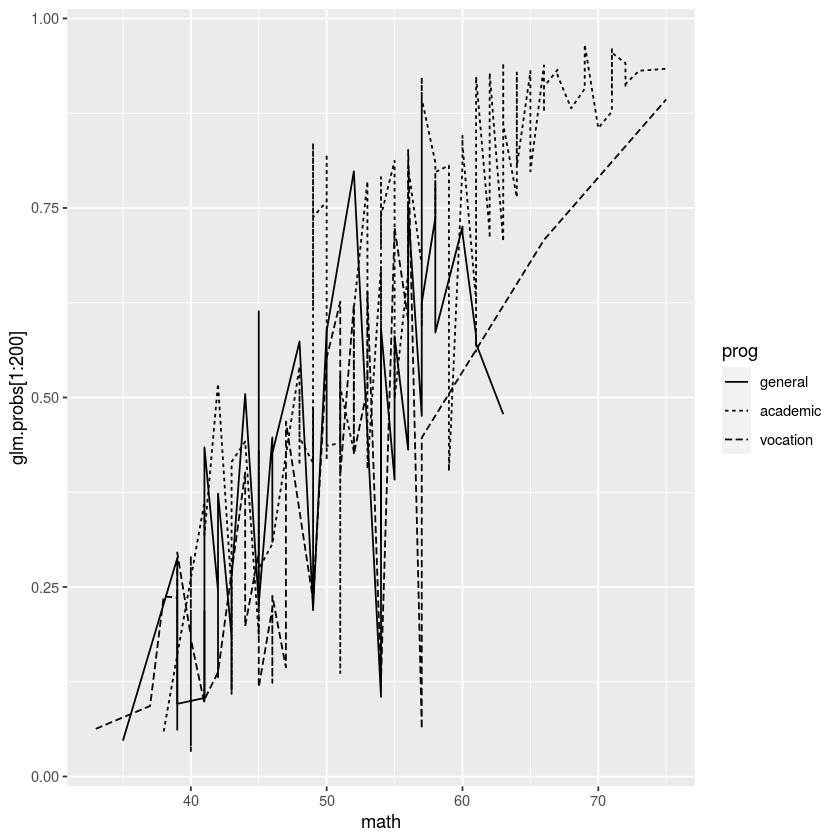

In [19]:
ggplot(ml, aes(x=math,y=glm.probs[1:200], group=prog, linetype=prog)) +geom_line()

[1] 0.2622911 0.2622911 0.3288538 0.2835111 0.2421088 0.2835111 0.3775550
  [8] 0.2421088 0.1309385 0.3775550 0.2421088 0.2049731 0.3288538 0.1880420
 [15] 0.2421088 0.2229968 0.3057202 0.2049731 0.3528309 0.2229968 0.2835111
 [22] 0.3528309 0.2421088 0.2421088 0.3057202 0.4550332 0.3288538 0.3775550
 [29] 0.3775550 0.2622911 0.2835111 0.4029146 0.3057202 0.4550332 0.2421088
 [36] 0.2229968 0.4550332 0.2835111 0.3057202 0.2622911 0.6611812 0.4815141
 [43] 0.3288538 0.2229968 0.5345826 0.2622911 0.2229968 0.2229968 0.5345826
 [50] 0.4287857 0.3528309 0.2421088 0.3775550 0.4815141 0.3057202 0.3057202
 [57] 0.5868067 0.2835111 0.3528309 0.5868067 0.4029146 0.3528309 0.3057202
 [64] 0.2421088 0.5345826 0.5345826 0.3528309 0.4550332 0.5608724 0.5868067
 [71] 0.4815141 0.4287857 0.5080805 0.2622911 0.5080805 0.3775550 0.6122505
 [78] 0.3775550 0.7486140 0.3528309 0.5868067 0.5868067 0.5080805 0.4550332
 [85] 0.6370792 0.5608724 0.4550332 0.6611812 0.2835111 0.3775550 0.3528309
 [92] 0.6122505 0.4029146 0.4815141 0.2622911 0.5345826 0.6611812 0.5608724
 [99] 0.5080805 0.6611812 0.5080805 0.2421088 0.4815141 0.6611812 0.1574158
[106] 0.4550332 0.4815141 0.6122505 0.4287857 0.5345826 0.5608724 0.7068317
[113] 0.8345085 0.6611812 0.5868067 0.6611812 0.5868067 0.5868067 0.5868067
[120] 0.4550332 0.5080805 0.6844592 0.7282331 0.5080805 0.7861929 0.4815141
[127] 0.5608724 0.5608724 0.6122505 0.6370792 0.4550332 0.7486140 0.4550332
[134] 0.6611812 0.8345085 0.6370792 0.7282331 0.6611812 0.7068317 0.6844592
[141] 0.6611812 0.8033659 0.7282331 0.5868067 0.7486140 0.6844592 0.6370792
[148] 0.7282331 0.6122505 0.6611812 0.7679403 0.6370792 0.5080805 0.6370792
[155] 0.7486140 0.7861929 0.7486140 0.8485204 0.4287857 0.7486140 0.6611812
[162] 0.4287857 0.8194655 0.7679403 0.7486140 0.5608724 0.6844592 0.8033659
[169] 0.8194655 0.6370792 0.7861929 0.6611812 0.9044410 0.8345085 0.7679403
[176] 0.6844592 0.7861929 0.8033659 0.9044410 0.8033659 0.8735887 0.8847269
[183] 0.8345085 0.6844592 0.7679403 0.8485204 0.8033659 0.7861929 0.8615343
[190] 0.9283387 0.8735887 0.8194655 0.8949949 0.8949949 0.7282331 0.8949949
[197] 0.9283387 0.8949949 0.9044410 0.9131143

,female,ses,schtyp,prog,math,glm.probs,glm.pred,read,write,science,socst
,<fct>,<fct>,<fct>,<fct>,<dbl>,"<dbl[,3]>",<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,female,low,public,vocation,41,"0.2622911, 0.3717016, 0.3660072",vocation,52.23,52.775,51.85,52.405
2,male,middle,public,general,41,"0.2622911, 0.3717016, 0.3660072",vocation,52.23,52.775,51.85,52.405
3,male,high,public,vocation,44,"0.3288538, 0.3469281, 0.3242181",vocation,52.23,52.775,51.85,52.405
4,male,low,public,vocation,42,"0.2835111, 0.3641298, 0.3523592",vocation,52.23,52.775,51.85,52.405
5,male,middle,public,vocation,40,"0.2421088, 0.3785700, 0.3793212",vocation,52.23,52.775,51.85,52.405
6,female,high,public,general,42,"0.2835111, 0.3641298, 0.3523592",vocation,52.23,52.775,51.85,52.405
7,male,middle,public,vocation,46,"0.3775550, 0.3271654, 0.2952797",vocation,52.23,52.775,51.85,52.405
8,male,middle,public,vocation,40,"0.2421088, 0.3785700, 0.3793212",vocation,52.23,52.775,51.85,52.405
9,female,middle,public,vocation,33,"0.1309385, 0.4076397, 0.4614217",vocation,52.23,52.775,51.85,52.405


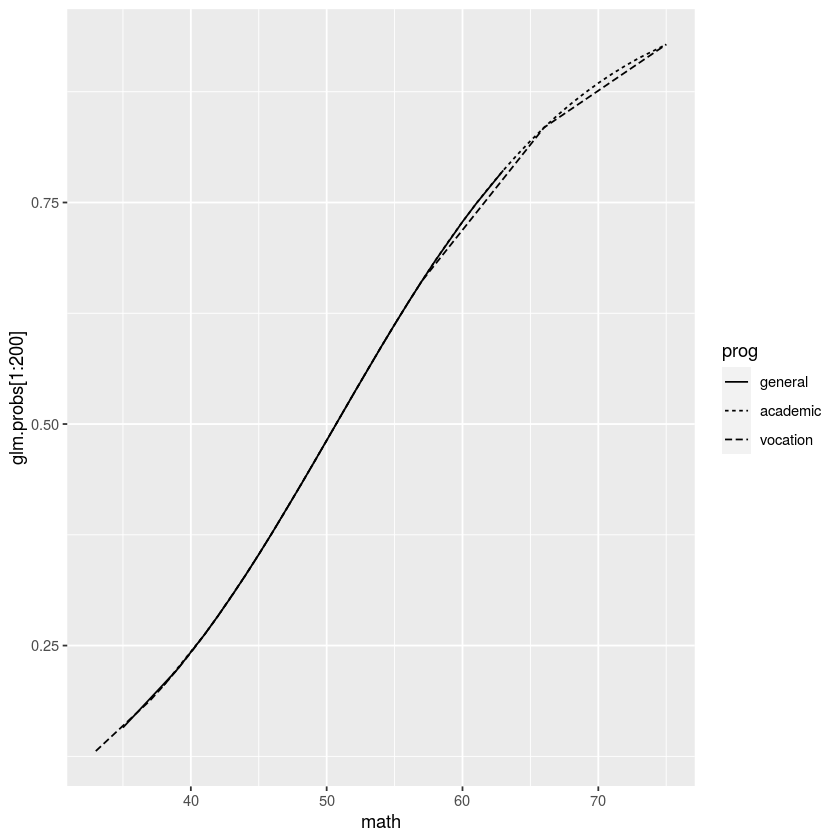

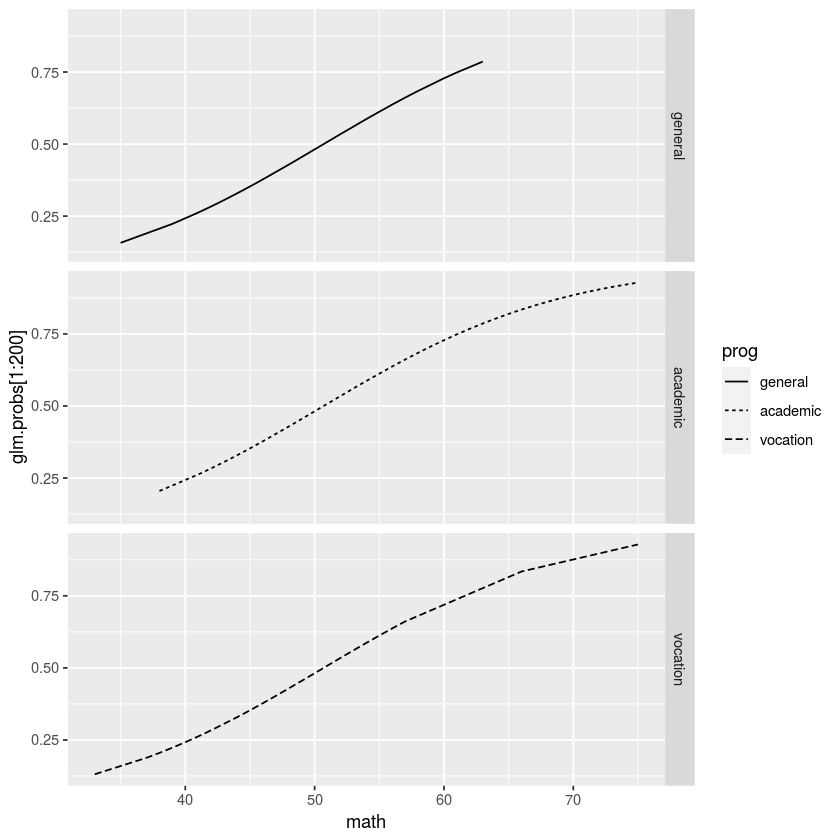

In [52]:
# New dataframe with Average for variables on part g
ml3<- ml
ml3$read <- NULL
ml3$write <- NULL
ml3$science <- NULL
ml3$socst <- NULL
ml3$id <- NULL
ml3$honors <- NULL
ml3$SUMscore <- NULL
ml3$cid <- NULL
ml3$awards <- NULL
ml3$prog2 <- NULL
ml3$read <- mean(ml$read)
ml3$write <- mean(ml$write)
ml3$science <- mean(ml$science)
ml3$socst <- mean(ml$socst)
ml3$glm.probs <- predict (test, ml3, "probs") # predict on new data
ml3$glm.probs[1:200]
ml3

# New chart for part g
ggplot(ml3, aes(x=math,y=glm.probs[1:200], group=prog, linetype=prog)) +geom_line()
ggplot(ml3, aes(x=math,y=glm.probs[1:200], group=prog, linetype=prog)) +geom_line()+facet_grid(prog~.)

In [27]:
prop2 <- group_by(ml, prog, read, write, science, socst, glm.probs[1:200]) %>% group_by(prog) %>% summarise(count=n()) %>%
  mutate(etotal=sum(count), proportion=count/etotal)

head(prop2, 5)

`summarise()` ungrouping output (override with `.groups` argument)



prog,count,etotal,proportion
<fct>,<int>,<int>,<dbl>
general,45,200,0.225
academic,105,200,0.525
vocation,50,200,0.250


prog,math,"as.factor(cut_number(math, 5))",mean
<fct>,<dbl>,<fct>,<dbl>
vocation,41,"[33,43]",39.47619
general,41,"[33,43]",41.07692
vocation,44,"(43,49.6]",45.91667
vocation,42,"[33,43]",39.47619
vocation,40,"[33,43]",39.47619
general,42,"[33,43]",41.07692
vocation,46,"(43,49.6]",45.91667
vocation,40,"[33,43]",39.47619
vocation,33,"[33,43]",39.47619


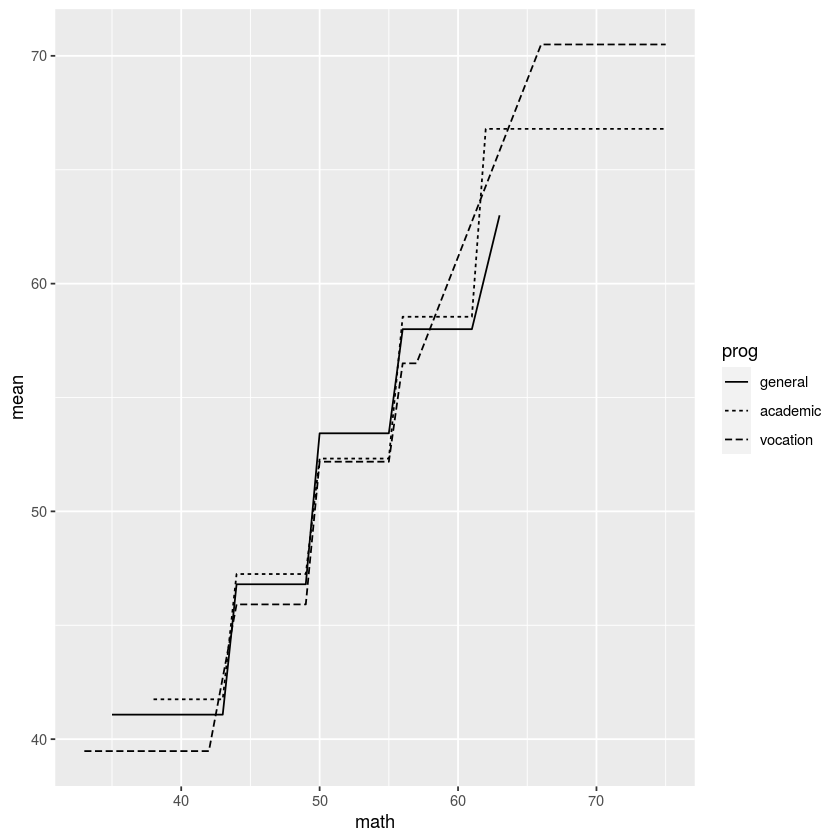

In [48]:
ml %>% select(prog, math) %>% group_by(prog, as.factor(cut_number(math,5))) %>% mutate(mean=mean(math)) ->ml4
ml4

# New chart for part g
ggplot(ml4, aes(x=math,y=mean, group=prog, linetype=prog)) +geom_line()